## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  55.953510  1134.636059  0.797977  7.038945  1.541635
1  44.115511  1620.736300  0.886846  5.433476  1.286514
2  29.103310   656.557602  0.629822  4.333196  1.492495
3  83.071229   749.997813  0.923832  8.517586  1.753258
4  54.731433   263.109794  0.882953  3.977030  1.382188


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9241583	total: 58ms	remaining: 58s
1:	learn: 0.9179148	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9111940	total: 59.3ms	remaining: 19.7s
3:	learn: 0.9047069	total: 59.8ms	remaining: 14.9s
4:	learn: 0.8971596	total: 60.4ms	remaining: 12s
5:	learn: 0.8915489	total: 60.8ms	remaining: 10.1s
6:	learn: 0.8862247	total: 61.3ms	remaining: 8.7s
7:	learn: 0.8792557	total: 61.9ms	remaining: 7.67s
8:	learn: 0.8725034	total: 62.4ms	remaining: 6.87s
9:	learn: 0.8644758	total: 62.8ms	remaining: 6.21s
10:	learn: 0.8577981	total: 63.3ms	remaining: 5.69s
11:	learn: 0.8499117	total: 63.7ms	remaining: 5.25s
12:	learn: 0.8428215	total: 64.2ms	remaining: 4.87s
13:	learn: 0.8358355	total: 64.6ms	remaining: 4.55s
14:	learn: 0.8292000	total: 65.1ms	remaining: 4.27s
15:	learn: 0.8244322	total: 65.5ms	remaining: 4.03s
16:	learn: 0.8184966	total: 65.9ms	remaining: 3.81s
17:	learn: 0.8135423	total: 66.4ms	remaining: 3.62s
18:	learn: 0.8079078	total: 66.8ms	remaining: 3.45s

127:	learn: 0.4312288	total: 117ms	remaining: 796ms
128:	learn: 0.4287809	total: 118ms	remaining: 794ms
129:	learn: 0.4270808	total: 118ms	remaining: 790ms
130:	learn: 0.4254035	total: 118ms	remaining: 786ms
131:	learn: 0.4238305	total: 119ms	remaining: 781ms
132:	learn: 0.4222284	total: 119ms	remaining: 777ms
133:	learn: 0.4205597	total: 120ms	remaining: 773ms
134:	learn: 0.4185488	total: 120ms	remaining: 770ms
135:	learn: 0.4172565	total: 121ms	remaining: 766ms
136:	learn: 0.4145613	total: 121ms	remaining: 761ms
137:	learn: 0.4128892	total: 121ms	remaining: 757ms
138:	learn: 0.4119516	total: 122ms	remaining: 754ms
139:	learn: 0.4100477	total: 122ms	remaining: 750ms
140:	learn: 0.4077423	total: 123ms	remaining: 747ms
141:	learn: 0.4060100	total: 123ms	remaining: 743ms
142:	learn: 0.4039831	total: 123ms	remaining: 740ms
143:	learn: 0.4019171	total: 124ms	remaining: 736ms
144:	learn: 0.4003660	total: 124ms	remaining: 733ms
145:	learn: 0.3984482	total: 125ms	remaining: 730ms
146:	learn: 

283:	learn: 0.2556029	total: 185ms	remaining: 467ms
284:	learn: 0.2547669	total: 186ms	remaining: 466ms
285:	learn: 0.2536811	total: 186ms	remaining: 465ms
286:	learn: 0.2527872	total: 187ms	remaining: 464ms
287:	learn: 0.2518464	total: 187ms	remaining: 463ms
288:	learn: 0.2512911	total: 188ms	remaining: 462ms
289:	learn: 0.2508955	total: 188ms	remaining: 461ms
290:	learn: 0.2506116	total: 189ms	remaining: 460ms
291:	learn: 0.2497671	total: 189ms	remaining: 459ms
292:	learn: 0.2488098	total: 190ms	remaining: 458ms
293:	learn: 0.2478573	total: 190ms	remaining: 456ms
294:	learn: 0.2469508	total: 191ms	remaining: 455ms
295:	learn: 0.2466456	total: 191ms	remaining: 454ms
296:	learn: 0.2456772	total: 191ms	remaining: 453ms
297:	learn: 0.2453684	total: 192ms	remaining: 452ms
298:	learn: 0.2449721	total: 192ms	remaining: 451ms
299:	learn: 0.2445828	total: 193ms	remaining: 449ms
300:	learn: 0.2438423	total: 193ms	remaining: 448ms
301:	learn: 0.2433134	total: 194ms	remaining: 447ms
302:	learn: 

551:	learn: 0.1282150	total: 299ms	remaining: 242ms
552:	learn: 0.1281199	total: 299ms	remaining: 242ms
553:	learn: 0.1274544	total: 300ms	remaining: 241ms
554:	learn: 0.1273607	total: 300ms	remaining: 241ms
555:	learn: 0.1272713	total: 301ms	remaining: 240ms
556:	learn: 0.1267698	total: 301ms	remaining: 240ms
557:	learn: 0.1266778	total: 302ms	remaining: 239ms
558:	learn: 0.1265628	total: 302ms	remaining: 238ms
559:	learn: 0.1264723	total: 302ms	remaining: 238ms
560:	learn: 0.1258292	total: 303ms	remaining: 237ms
561:	learn: 0.1257235	total: 303ms	remaining: 236ms
562:	learn: 0.1256119	total: 304ms	remaining: 236ms
563:	learn: 0.1255085	total: 304ms	remaining: 235ms
564:	learn: 0.1253994	total: 305ms	remaining: 235ms
565:	learn: 0.1252980	total: 305ms	remaining: 234ms
566:	learn: 0.1250206	total: 305ms	remaining: 233ms
567:	learn: 0.1247432	total: 306ms	remaining: 233ms
568:	learn: 0.1244459	total: 306ms	remaining: 232ms
569:	learn: 0.1239959	total: 307ms	remaining: 231ms
570:	learn: 

713:	learn: 0.0914646	total: 367ms	remaining: 147ms
714:	learn: 0.0913288	total: 368ms	remaining: 147ms
715:	learn: 0.0909950	total: 368ms	remaining: 146ms
716:	learn: 0.0906857	total: 369ms	remaining: 146ms
717:	learn: 0.0905527	total: 369ms	remaining: 145ms
718:	learn: 0.0904694	total: 369ms	remaining: 144ms
719:	learn: 0.0903378	total: 370ms	remaining: 144ms
720:	learn: 0.0900213	total: 370ms	remaining: 143ms
721:	learn: 0.0898915	total: 371ms	remaining: 143ms
722:	learn: 0.0897632	total: 371ms	remaining: 142ms
723:	learn: 0.0896807	total: 372ms	remaining: 142ms
724:	learn: 0.0895538	total: 372ms	remaining: 141ms
725:	learn: 0.0893743	total: 373ms	remaining: 141ms
726:	learn: 0.0890643	total: 373ms	remaining: 140ms
727:	learn: 0.0888561	total: 374ms	remaining: 140ms
728:	learn: 0.0887741	total: 374ms	remaining: 139ms
729:	learn: 0.0885547	total: 375ms	remaining: 139ms
730:	learn: 0.0884734	total: 375ms	remaining: 138ms
731:	learn: 0.0883549	total: 375ms	remaining: 137ms
732:	learn: 

964:	learn: 0.0485742	total: 480ms	remaining: 17.4ms
965:	learn: 0.0485151	total: 481ms	remaining: 16.9ms
966:	learn: 0.0483316	total: 481ms	remaining: 16.4ms
967:	learn: 0.0482775	total: 482ms	remaining: 15.9ms
968:	learn: 0.0480838	total: 482ms	remaining: 15.4ms
969:	learn: 0.0479053	total: 482ms	remaining: 14.9ms
970:	learn: 0.0477861	total: 483ms	remaining: 14.4ms
971:	learn: 0.0477332	total: 483ms	remaining: 13.9ms
972:	learn: 0.0475573	total: 484ms	remaining: 13.4ms
973:	learn: 0.0474432	total: 484ms	remaining: 12.9ms
974:	learn: 0.0472683	total: 485ms	remaining: 12.4ms
975:	learn: 0.0472166	total: 485ms	remaining: 11.9ms
976:	learn: 0.0470450	total: 485ms	remaining: 11.4ms
977:	learn: 0.0468737	total: 486ms	remaining: 10.9ms
978:	learn: 0.0467329	total: 486ms	remaining: 10.4ms
979:	learn: 0.0465656	total: 487ms	remaining: 9.93ms
980:	learn: 0.0464822	total: 487ms	remaining: 9.43ms
981:	learn: 0.0464277	total: 488ms	remaining: 8.94ms
982:	learn: 0.0462750	total: 488ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


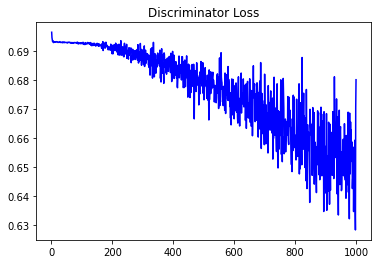

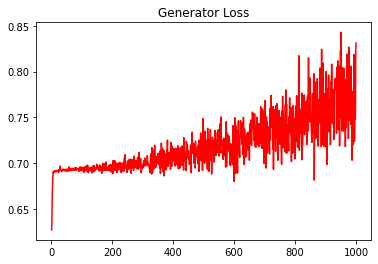

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.37033484036549125


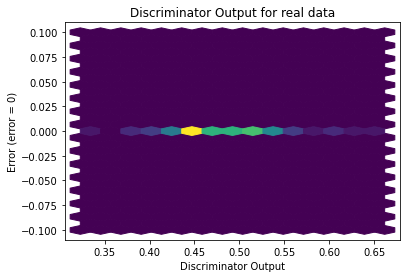

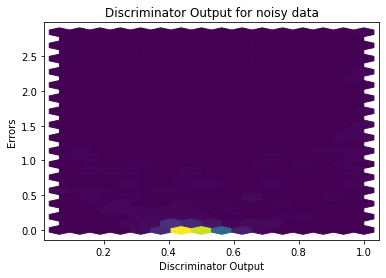

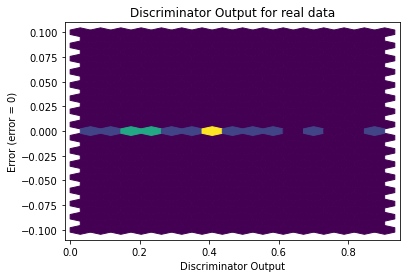

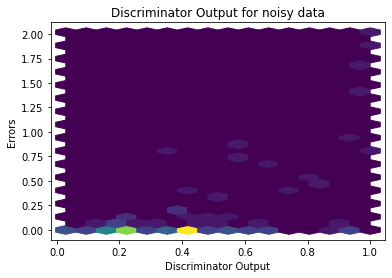

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
